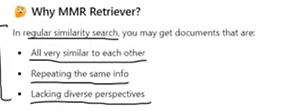

In [4]:
!pip install langchain chromadb faiss-cpu sentence-transformers tiktoken pypdf langchain-community

Some Libraries

In [5]:
from langchain_community.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
from langchain_core.documents import Document

In [6]:
# Sample documents
docs = [
    Document(page_content="LangChain makes it easy to work with LLMs."),
    Document(page_content="LangChain is used to build LLM based applications."),
    Document(page_content="Chroma is used to store and search document embeddings."),
    Document(page_content="Embeddings are vector representations of text."),
    Document(page_content="MMR helps you get diverse results when doing similarity search."),
    Document(page_content="LangChain supports Chroma, FAISS, Pinecone, and more."),
]

In [7]:
# Step 2: Initialize embedding model
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Step 3: Create the FAISS vector store from documents
vectorstore = FAISS.from_documents(
    documents = docs,
    embedding = embedding_model
)

<ipython-input-7-ee7ee717548b>:2: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models 

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Convert FAISS vectorstore into a retriever

In [11]:
# Enable MMR in the retriever
retriever = vectorstore.as_retriever(
    search_type = 'mmr',                # <-- This enables MMR
    search_kwargs = {"k":3, "lambda_mult": 0.2}
    # <-- lambda_mult = (0-1) relevance-diversity balance

)

In [12]:
query = 'What is langchain?'
result = retriever.invoke(query)

In [13]:
for i ,doc in enumerate(result):
  print(f"\n--- Result {i+1} ---")
  print(doc.page_content)



--- Result 1 ---
LangChain supports Chroma, FAISS, Pinecone, and more.

--- Result 2 ---
Embeddings are vector representations of text.

--- Result 3 ---
MMR helps you get diverse results when doing similarity search.
